<h3>Введение</h3>

<b>Иерархическое байесовское моделирование</b> (Hierarchical Bayesian Modeling) - это метод статистического моделирования, который позволяет учитывать несколько уровней изменчивости в данных. Он основан на байесовском подходе к статистическому моделированию и используется в различных областях в том числе и медицине.

В иерархическом байесовском моделировании каждый уровень данных моделируется как случайная величина, которая зависит от параметров, которые также являются случайными величинами. Параметры на более высоком уровне в иерархии моделируют распределение параметров на более низком уровне. Таким образом, каждый уровень в иерархии моделирует собственную изменчивость, но также учитывает общую изменчивость на более высоких уровнях.

Основные преимущества иерархического байесовского моделирования заключаются в возможности использования информации из более высоких уровней для улучшения оценок параметров на более низких уровнях и учета различных источников изменчивости данных. Это может быть особенно полезно в случаях, когда данных мало или когда данные имеют сложную структуру.

Примером иерархической байесовской модели может быть модель, используемая в медицине для анализа эффекта лекарств на разных пациентах. В этой модели каждый пациент может иметь свою собственную реакцию на лекарство, но также может быть общая изменчивость между пациентами, которая может быть моделирована на более высоком уровне в иерархии.

Оценка параметров иерархической байесовской модели производится с помощью алгоритма МСМС (Markov Chain Monte Carlo Sampling), который использует байесовский подход и генерирует выборку из апостериорного распределения параметров. Построение модели может быть ресурсоемкой и требует навыков в статистике и программировании.

При моделировании иерархических байесовских моделей, важно правильно определить гиперпараметры, которые описывают априорные распределения для параметров на каждом уровне иерархии. Определение гиперпараметров является критическим шагом в построении модели и может влиять на результаты моделирования.

При оценке параметров иерархической байесовской модели, можно получить интересующие нас характеристики, такие как наиболее вероятное значение параметров, доверительные интервалы, статистики сравнения моделей и т.д.

В Python для моделирования иерархических байесовских моделей широко используются библиотеки, такие как PyMC3, Stan и JAGS. Мы будем использовать PyMC3.

<h3>Относительно нашего исследования</h3>

Иерархическое байесовское моделирование может быть полезным для анализа данных в вашем исследовании. Оно позволит учитывать как индивидуальные, так и групповые различия в параметрах контрастной чувствительности и микротремора глаз в зависимости от уровня тревоги.

Вы можете использовать баллы по тревожности, а не групповой признак, в качестве предикторов в вашей модели. Это позволит более точно учитывать различия в тревожности между индивидуальными испытуемыми и улучшить прогнозы.

В целом, иерархическое байесовское моделирование может помочь вам оценить не только средние значения параметров для каждой группы, но и дисперсии, которые могут различаться между группами и между испытуемыми внутри каждой группы. Также, вы сможете получить более точную оценку на основе меньшего количества данных, что может быть полезно в случае ограниченности выборки.

In [29]:
import pandas as pd
import numpy as np
import pymc3 as pm
import arviz as az

import pandas as pd
import numpy as np
import scipy.stats as stats
import statsmodels.api as sm
import seaborn as sns
import pymc3 as pm

In [38]:
df = pd.read_csv("data.csv").drop(columns='id')
df.head()

,Пол,Возраст,Ситуативная_балл,Личностная_балл,Ситуативная_группа,Личностная_группа,0.2,0.4,0.6,0.8,...,ft56,ft67,ft71,ft110,At04,At45,At56,At67,At71,At110
0,Муж,31,24,22,1,1,"8,4","10,6","8,5","18,8",...,"0,041","0,099","0,483","0,352","0,06","0,276","0,348","0,299","0,293","0,294"
1,Муж,31,25,31,1,2,"15,3",9,"23,4","12,5",...,"0,061","0,14","0,421","0,346","0,0562","0,18","0,195","0,196","0,201","0,2"
2,Муж,39,25,38,1,2,"11,2","15,9","12,7","9,8",...,"0,049","0,091","0,453","0,376","0,2647","0,35","0,203","0,439","0,338","0,33"
3,Жен,47,27,41,1,2,"6,7","8,8",23,25,...,"0,047","0,14","0,42","0,352","0,2158","0,235","0,31","0,251","0,284","0,291"
4,Муж,47,32,25,2,1,"8,3","14,9","19,1",19,...,"0,064","0,118","0,401","0,391","0,1438","0,16","0,246","0,257","0,253","0,255"


In [86]:
df.iloc[:,:-2].to_csv('clean.csv')

Убедимся в целосности данных 

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 29 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Пол                 40 non-null     object
 1   Возраст             40 non-null     int64 
 2   Ситуативная_балл    40 non-null     int64 
 3   Личностная_балл     40 non-null     int64 
 4   Ситуативная_группа  40 non-null     int64 
 5   Личностная_группа   40 non-null     int64 
 6   0.2                 40 non-null     object
 7   0.4                 40 non-null     object
 8   0.6                 40 non-null     object
 9   0.8                 40 non-null     object
 10  1.0                 40 non-null     object
 11  3.0                 40 non-null     object
 12  6.0                 40 non-null     object
 13  8.0                 40 non-null     object
 14  10.0                40 non-null     object
 15  mof                 40 non-null     object
 16  moA                 40 non-n

переведем колонки с частотой и амплитудой из строкового формата в числовой, чтоб можно было делать расчеты

In [40]:
# преобразование категориальных переменных в числа
df['Пол'] = (df['Пол'] == 'Муж').astype(int)
df['Ситуативная_группа'] = df['Ситуативная_группа'].astype(int)
df['Личностная_группа'] = df['Личностная_группа'].astype(int)

# Замена запятых на точки и преобразование строковых значений в числа
df["0.2"] = df["0.2"].str.replace(",", ".").astype(float)
df["0.4"] = df["0.4"].str.replace(",", ".").astype(float)
df["0.6"] = df["0.6"].str.replace(",", ".").astype(float)
df["0.8"] = df["0.8"].str.replace(",", ".").astype(float)
df["1.0"] = df["1.0"].str.replace(",", ".").astype(float)
df["3.0"] = df["3.0"].str.replace(",", ".").astype(float)
df["6.0"] = df["6.0"].str.replace(",", ".").astype(float)
df["8.0"] = df["8.0"].str.replace(",", ".").astype(float)
df["10.0"] = df["10.0"].str.replace(",", ".").astype(float)
df["mof"] = df["mof"].str.replace(",", ".").astype(float)
df["moA"] = df["moA"].str.replace(",", ".").astype(float)
df["ft04"] = df["ft04"].str.replace(",", ".").astype(float)
df["ft45"] = df["ft45"].str.replace(",", ".").astype(float)
df["ft56"] = df["ft56"].str.replace(",", ".").astype(float)
df["ft67"] = df["ft67"].str.replace(",", ".").astype(float)
df["ft71"] = df["ft71"].str.replace(",", ".").astype(float)
df["ft110"] = df["ft110"].str.replace(",", ".").astype(float)
df["At04"] = df["At04"].str.replace(",", ".").astype(float)
df["At45"] = df["At45"].str.replace(",", ".").astype(float)
df["At56"] = df["At56"].str.replace(",", ".").astype(float)
df["At67"] = df["At67"].str.replace(",", ".").astype(float)
df["At71"] = df["At71"].str.replace(",", ".").astype(float)
df["At110"] = df["At110"].str.replace(",", ".").astype(float)

Выведим для них описательную статистику

In [33]:
df.describe()

,Пол,Возраст,Ситуативная_балл,Личностная_балл,Ситуативная_группа,Личностная_группа,0.2,0.4,0.6,0.8,...,ft56,ft67,ft71,ft110,At04,At45,At56,At67,At71,At110
count,40.000000,40.00000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,...,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000
mean,0.475000,28.65000,44.250000,46.050000,2.375000,2.500000,9.660000,13.282500,16.272500,17.705000,...,0.052995,0.119605,0.434020,0.363110,0.121952,0.249908,0.274350,0.263857,0.269508,0.266113
std,0.505736,10.01934,12.005875,11.775572,0.667467,0.599145,4.143688,3.931783,6.503056,6.991421,...,0.006725,0.013550,0.019358,0.013357,0.120946,0.065421,0.063667,0.047422,0.053564,0.047015
min,0.000000,19.00000,24.000000,22.000000,1.000000,1.000000,1.200000,5.200000,5.500000,6.100000,...,0.040000,0.091000,0.401000,0.327300,0.000000,0.114000,0.104000,0.181800,0.179000,0.175000
25%,0.000000,20.75000,37.750000,39.750000,2.000000,2.000000,6.700000,10.450000,12.125000,12.575000,...,0.047825,0.111850,0.420750,0.352875,0.059550,0.195450,0.241275,0.230375,0.231375,0.227775
50%,0.000000,23.00000,43.500000,45.500000,2.000000,3.000000,9.700000,13.150000,15.950000,18.950000,...,0.052300,0.118500,0.428500,0.364500,0.093850,0.257750,0.266000,0.263000,0.264700,0.260400
75%,1.000000,34.50000,51.000000,51.000000,3.000000,3.000000,11.400000,16.125000,19.900000,22.950000,...,0.058825,0.128500,0.449250,0.373100,0.143500,0.292300,0.309250,0.286325,0.296750,0.296250
max,1.000000,49.00000,79.000000,75.000000,3.000000,3.000000,23.100000,20.300000,31.700000,29.700000,...,0.065000,0.150000,0.483000,0.391000,0.739600,0.396000,0.449000,0.439000,0.448000,0.372000


Так как наши предикторы Микротреммор глаз (частота (обозначается ft) и (амплитуда At)) и Контрастная чувствительность измеренны для разных диапазоннах и интервалах соответсвенно, есть подозрение что между теми самыми диапазонаями будет корреляция.

Проверим данное предположение с посчитав для столбцов <b>коеффициент пирсона</b> и провизуализировав результат.

<Axes: >

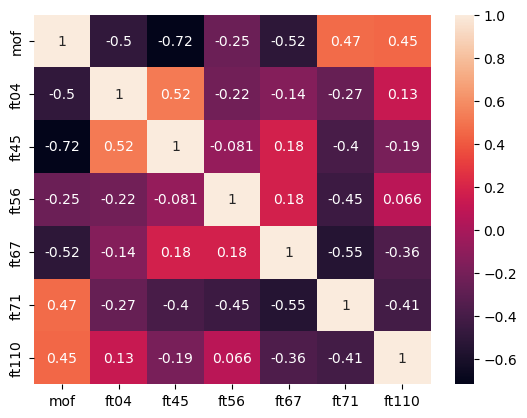

In [102]:
import seaborn as sns

f_cols = ['mof', 'ft04', 'ft45', 'ft56', 'ft67', 'ft71', 'ft110']

# Посчитать коэффициенты корреляции
corr_matrix_f = df[f_cols].corr()

# Визуализировать корреляционную матрицу
sns.heatmap(corr_matrix_f, annot=True)

<Axes: >

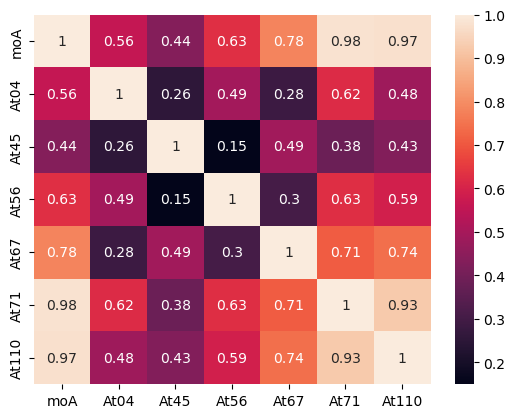

In [101]:
A_cols = ['moA', 'At04', 'At45', 'At56', 'At67', 'At71', 'At110']

corr_matrix_A = df[A_cols].corr()

sns.heatmap(corr_matrix_A, annot=True)

In [105]:
df.columns

Index(['Пол', 'Возраст', 'Ситуативная_балл', 'Личностная_балл',
       'Ситуативная_группа', 'Личностная_группа', '0.2', '0.4', '0.6', '0.8',
       '1.0', '3.0', '6.0', '8.0', '10.0', 'mof', 'moA', 'ft04', 'ft45',
       'ft56', 'ft67', 'ft71', 'ft110', 'At04', 'At45', 'At56', 'At67', 'At71',
       'At110', 'Ситуативная_уровень', 'Личностная_уровень'],
      dtype='object')

<Axes: >

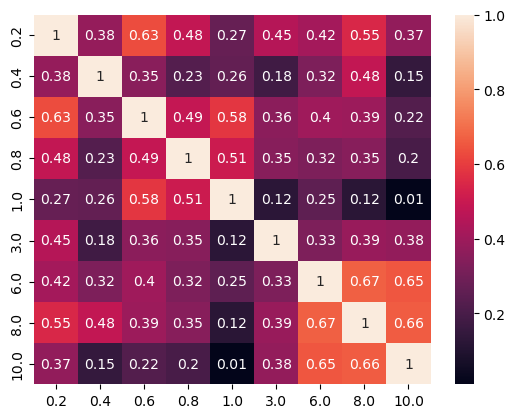

In [106]:
S_cols = ['0.2', '0.4', '0.6', '0.8', '1.0', '3.0', '6.0', '8.0', '10.0']

corr_matrix_S = df[S_cols].corr()

sns.heatmap(corr_matrix_S, annot=True)

Недопустимым уровнем корреляции между предикторами в машинном обучении считают 0.85+ по Пирсону, по этому удалим только несколько столбцов которые отвечают за амплитуду. Из трех сильно-скорелированных столбцов ('At71', 'At110' и 'moA') оставлю только 'moA' (средняя амплитуда).

In [107]:
df = df.drop(columns=['At71', 'At110'])

Сохраним преобразованные и очищенные данные в файл clean.csv

In [115]:
df.to_csv('clean.csv')

<h2> Построение иерархической байесовской модели

В этой функции мы определяем все параметры модели, 
в том числе гиперпараметры и интерсепты для каждой группы. 
Мы также определяем априорные распределения для предикторов, 
модельную ошибку и логарифмическую функцию правдоподобия. 
После этого мы проводим сэмплирование модели, используя функцию pm.sample(), 
которая возвращает объект trace.

In [116]:
import pandas as pd
import numpy as np
import pymc3 as pm
import theano.tensor as tt

# Загрузка данных
# data = pd.read_csv('clean.csv')

# Извлечение данных
predictors = ['0.2', '0.4', '0.6', '0.8', '1.0', '3.0', '6.0', '8.0', '10.0', 'mof', 'moA', 'ft04', 'ft45', 'ft56', 'ft67', 'ft71', 'ft110', 'At04', 'At45', 'At56', 'At67']
X_contrast = df[['0.2', '0.4', '0.6', '0.8', '1.0', '3.0', '6.0', '8.0', '10.0']].values
X_tremor = df[['mof', 'moA', 'ft04', 'ft45', 'ft56', 'ft67', 'ft71', 'ft110', 'At04', 'At45', 'At56', 'At67']].values
situational_anxiety = df['Ситуативная_балл'].values
personal_anxiety = df['Личностная_балл'].values

# Подготовка данных для анализа
n_subjects = len(df)

# Иерархическая байесовская модель
with pm.Model() as hierarchical_model:
    # Гиперпараметры
    mu_contrast = pm.Normal('mu_contrast', mu=0, sd=10, shape=9)
    sigma_contrast = pm.HalfNormal('sigma_contrast', sd=10, shape=9)
    
    mu_tremor = pm.Normal('mu_tremor', mu=0, sd=10, shape=12)
    sigma_tremor = pm.HalfNormal('sigma_tremor', sd=10, shape=12)
    
    # Параметры субъектов
    contrast = pm.Normal('contrast', mu=mu_contrast, sd=sigma_contrast, shape=(n_subjects, 9))
    tremor = pm.Normal('tremor', mu=mu_tremor, sd=sigma_tremor, shape=(n_subjects, 12))
    
    # Зависимость между параметрами и тревожностью
    situational_coef = pm.Normal('situational_coef', mu=0, sd=1, shape=21)
    personal_coef = pm.Normal('personal_coef', mu=0, sd=1, shape=21)
    
    # Линейная модель
    mu_situational = tt.dot(np.hstack((X_contrast, X_tremor)), situational_coef)
    mu_personal = tt.dot(np.hstack((X_contrast, X_tremor)), personal_coef)
    
    # Наблюдения
    obs_situational = pm.Normal('obs_situational', mu=mu_situational, sd=1, observed=situational_anxiety)
    obs_personal = pm.Normal('obs_personal', mu=mu_personal, sd=1, observed=personal_anxiety)
    
    # Запуск алгоритма MCMC для получения апостериорного распределения
    trace = pm.sample(2000, target_accept=0.95, return_inferencedata=True)



Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [personal_coef, situational_coef, tremor, contrast, sigma_tremor, mu_tremor, sigma_contrast, mu_contrast]


Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 269 seconds.
There were 5 divergences after tuning. Increase `target_accept` or reparameterize.
The chain reached the maximum tree depth. Increase max_treedepth, increase target_accept or reparameterize.
There were 219 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.8904104381831056, but should be close to 0.95. Try to increase the number of tuning steps.
The chain reached the maximum tree depth. Increase max_treedepth, increase target_accept or reparameterize.
There were 50 divergences after tuning. Increase `target_accept` or reparameterize.
The chain reached the maximum tree depth. Increase max_treedepth, increase target_accept or reparameterize.
The chain reached the maximum tree depth. Increase max_treedepth, increase target_accept or reparameterize.
The rhat statistic is larger than 1.4 for some parameters.

Функция az.plot_trace(trace) ниже создает графики, которые визуализируют результаты MCMC (Markov Chain Monte Carlo) семплирования. Графики состоят из двух частей для каждого параметра: левая часть — это график плотности апостериорного распределения параметра, а правая часть — это график трассировки (trace plot), который показывает значения параметра на каждом шаге MCMC.

    График плотности (левая часть): Это график апостериорного распределения параметра после MCMC семплирования. Форма графика показывает, насколько параметр определен. Если распределение узкое и скошенное, это указывает на то, что параметр хорошо определен. Если распределение широкое и плоское, это может указывать на неопределенность или мультиколлинеарность данных.

    Trace plot (правая часть): График трассировки показывает значения параметра на каждом шаге MCMC. Он используется для оценки сходимости алгоритма. Если график трассировки представляет собой хорошо перемешанный и стационарный процесс (то есть без очевидных трендов, скачков или периодичности), это указывает на хорошую сходимость алгоритма. Если же график имеет вид плохо перемешанных или стационарных процессов, это может указывать на проблемы с сходимостью

array([[<Axes: title={'center': 'mu_contrast'}>,
        <Axes: title={'center': 'mu_contrast'}>],
       [<Axes: title={'center': 'mu_tremor'}>,
        <Axes: title={'center': 'mu_tremor'}>],
       [<Axes: title={'center': 'contrast'}>,
        <Axes: title={'center': 'contrast'}>],
       [<Axes: title={'center': 'tremor'}>,
        <Axes: title={'center': 'tremor'}>],
       [<Axes: title={'center': 'situational_coef'}>,
        <Axes: title={'center': 'situational_coef'}>],
       [<Axes: title={'center': 'personal_coef'}>,
        <Axes: title={'center': 'personal_coef'}>],
       [<Axes: title={'center': 'sigma_contrast'}>,
        <Axes: title={'center': 'sigma_contrast'}>],
       [<Axes: title={'center': 'sigma_tremor'}>,
        <Axes: title={'center': 'sigma_tremor'}>]], dtype=object)

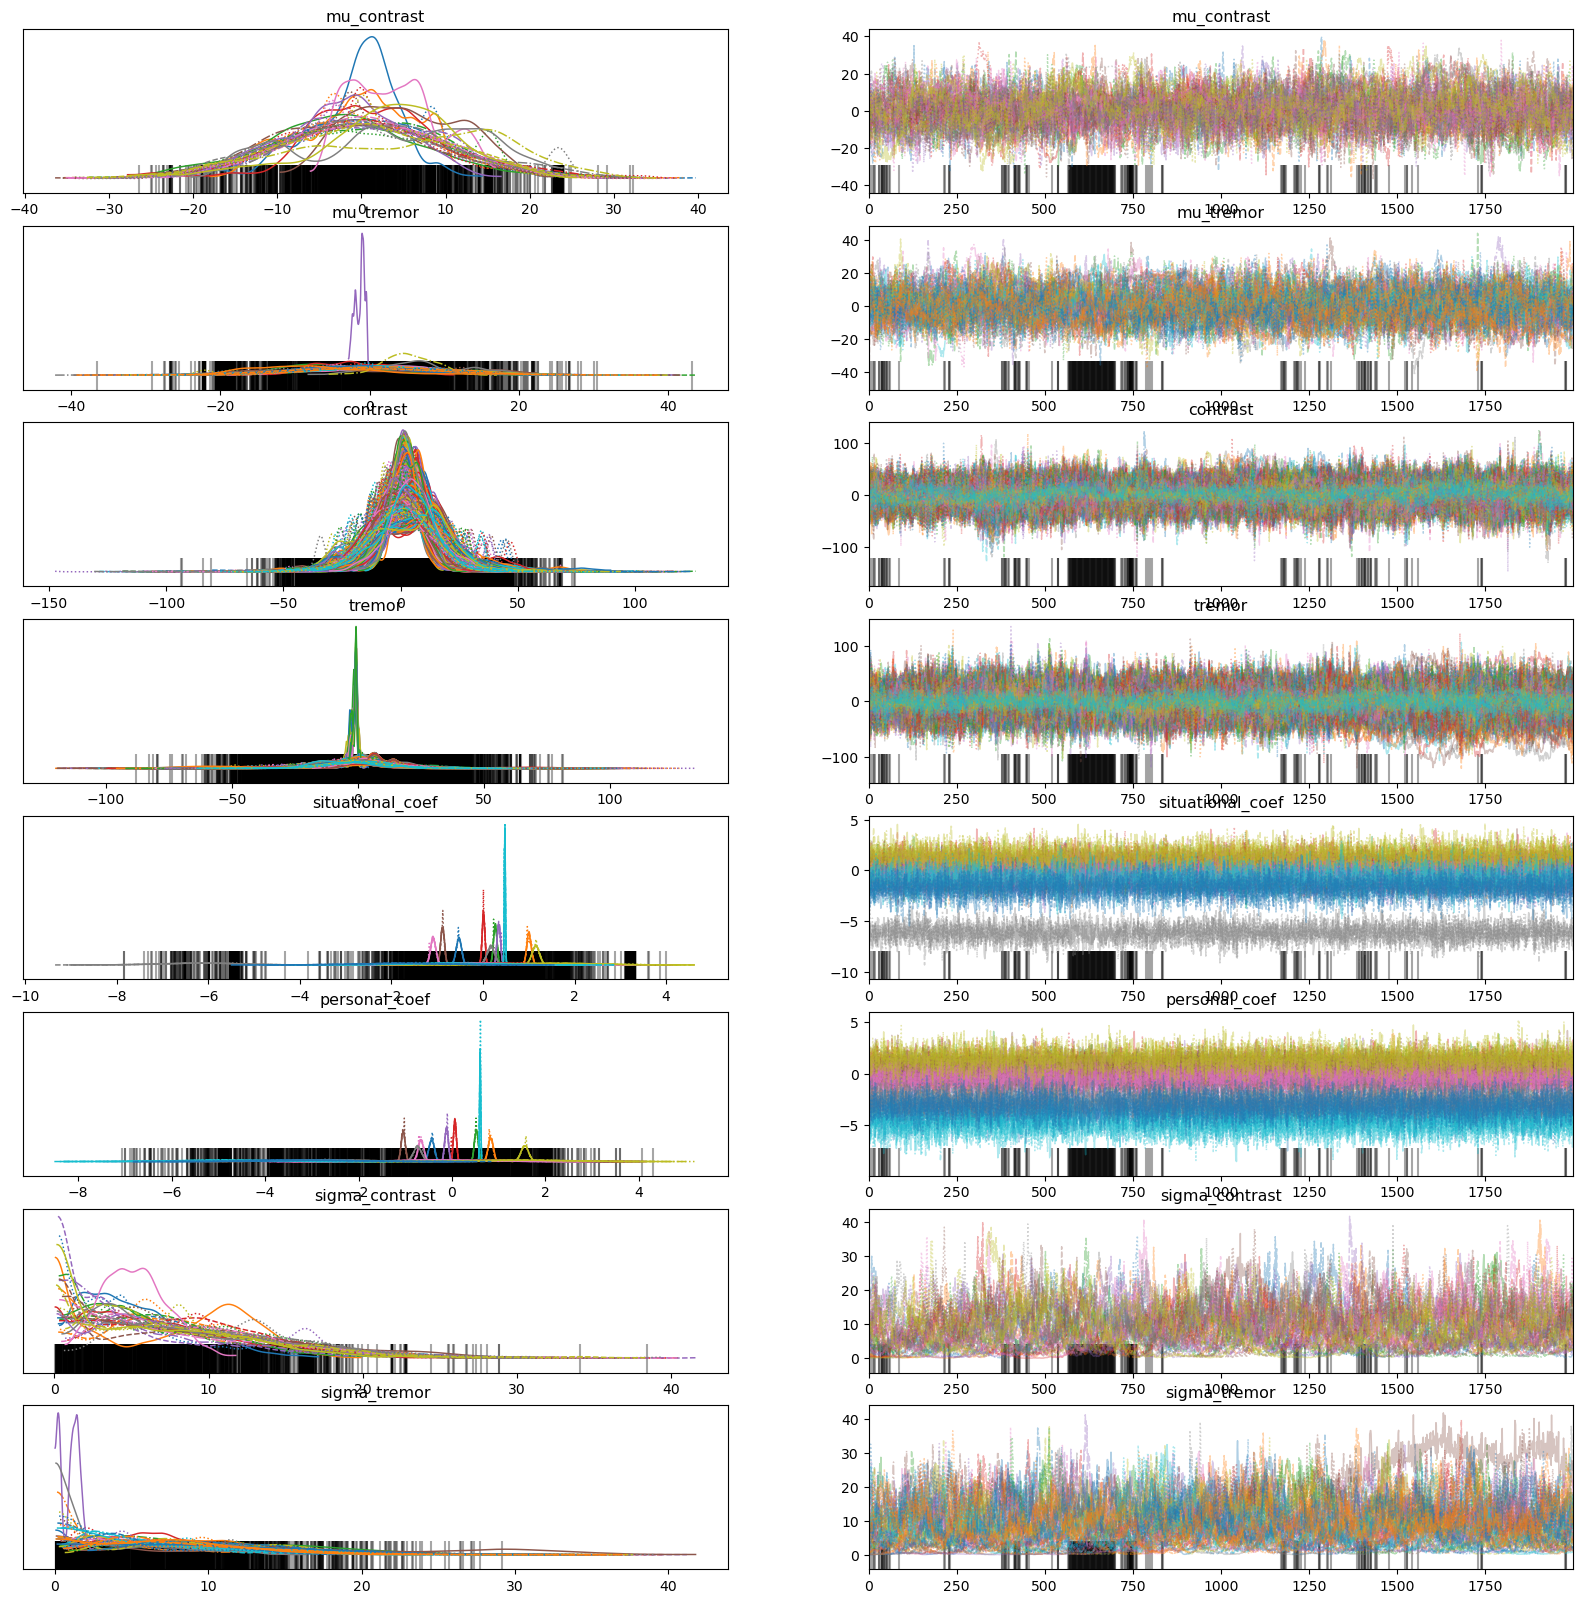

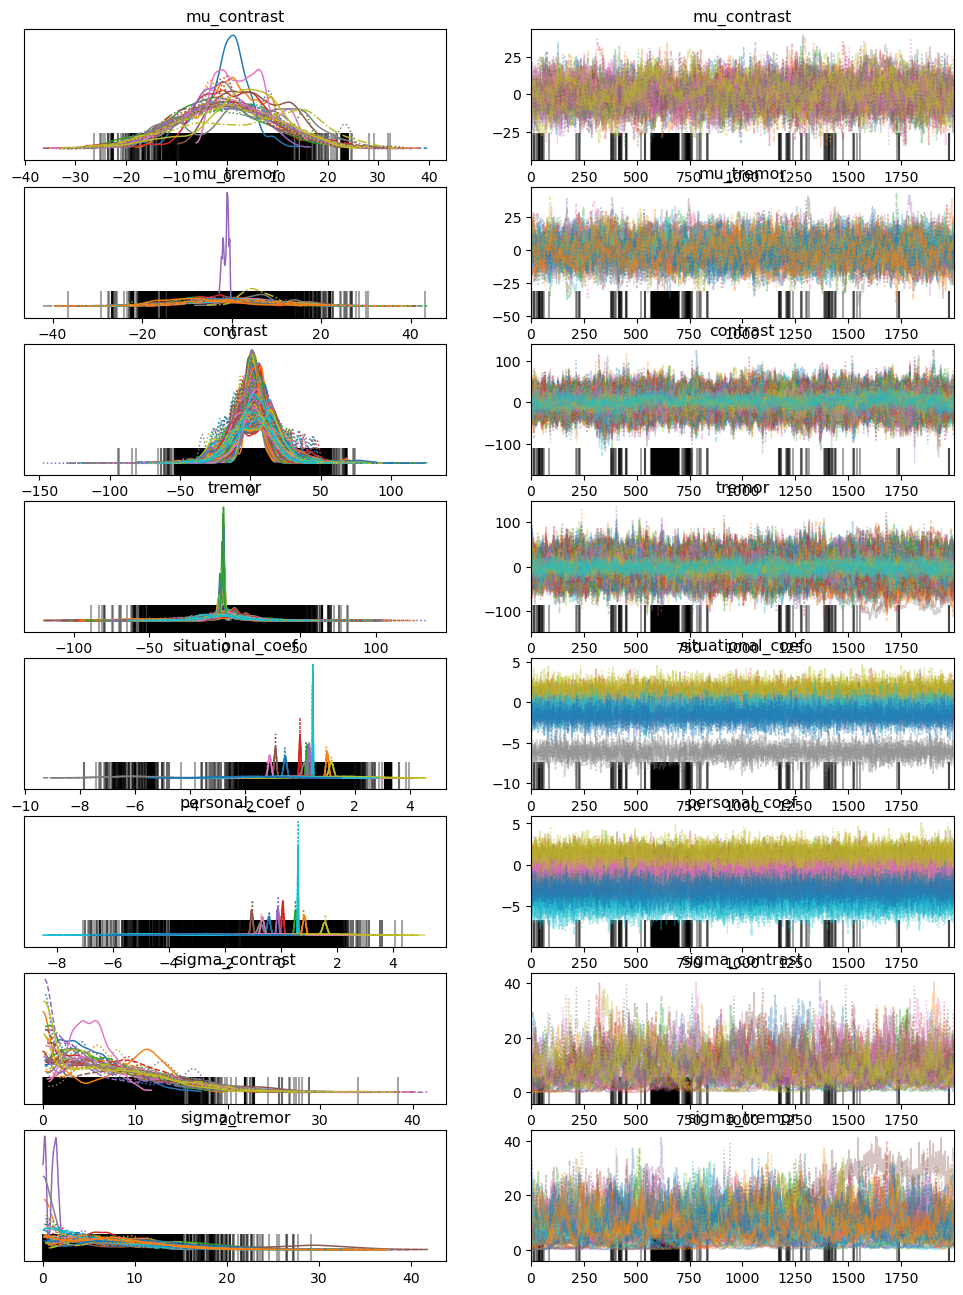

In [122]:
# Анализ результатов
import arviz as az

az.plot_trace(trace, figsize=(20, 20))

# Проверка сходимости модели
az.plot_trace(trace)

<h5>Проанализируем графики</h5>

Анализируя графики, обратитим внимание на следующие аспекты:

   <b>Форма апостериорного распределения</b>: Широкое и плоское распределение указывает на большую неопределенность, как раз то что мы видим в случае Контрастной  чувствительности. В случае микротремора все немного лучше. Но будем смотреть еще и численные значения для принятия решения.
   
   <b>Сходимость алгоритма</b>: График трассировки выглядит как хорошо перемешанный и стационарный процесс, это указывает на успешную сходимость алгоритма. Значит количество итераци и параметры семплирования выбраны правильно.

<h5> Посмотрим на численные значения </h5>

In [124]:
situational_coef_summary = az.summary(trace, var_names=['situational_coef'])
situational_coef_summary.iloc[:, :4]

,mean,sd,hdi_3%,hdi_97%
situational_coef[0],-0.526,0.057,-0.633,-0.420
situational_coef[1],1.007,0.051,0.915,1.103
situational_coef[2],0.268,0.039,0.191,0.338
situational_coef[3],0.012,0.030,-0.046,0.067
situational_coef[4],0.346,0.037,0.276,0.410
situational_coef[5],-0.883,0.040,-0.960,-0.809
situational_coef[6],-1.089,0.058,-1.196,-0.980
situational_coef[7],0.170,0.086,0.005,0.324
situational_coef[8],1.152,0.080,0.997,1.299
situational_coef[9],0.479,0.012,0.457,0.500


In [123]:
personal_coef_summary = az.summary(trace, var_names=['personal_coef'])
personal_coef_summary.iloc[:, :4]

,mean,sd,hdi_3%,hdi_97%
personal_coef[0],-0.434,0.058,-0.542,-0.324
personal_coef[1],0.828,0.052,0.732,0.926
personal_coef[2],0.521,0.039,0.445,0.592
personal_coef[3],0.063,0.032,0.003,0.125
personal_coef[4],-0.115,0.036,-0.185,-0.050
personal_coef[5],-1.044,0.040,-1.120,-0.968
personal_coef[6],-0.665,0.058,-0.777,-0.558
personal_coef[7],-0.735,0.086,-0.900,-0.581
personal_coef[8],1.559,0.078,1.406,1.699
personal_coef[9],0.604,0.012,0.582,0.627


<h5> Интерпретация результатов </h5>

Чем коэффициенты в situational_coef и personal_coef сильнее отличаются от нуля,
тем сильнее связи между параметрами и тревогой.

Для определения значимости различий в situational_coef_summary, обратим внимание на следующие значения:

    mean: среднее значение коэффициента, которое оценивает величину связи между параметрами и ситуативной тревогой. Если среднее значение близко к нулю, это указывает на отсутствие значимой связи.

    hdi_3% и hdi_97%: нижняя и верхняя границы 95% доверительного интервала для коэффициента. Если доверительный интервал не содержит нуля, это указывает на значимость коэффициента на уровне 0.05.

Для анализа результатов, проверим средние значения коэффициентов и их доверительные интервалы. Если среднее значение коэффициента значительно отличается от нуля и 95% доверительный интервал не содержит нуля, это указывает на статистически значимую связь между параметрами и ситуативной тревогой. Если же доверительный интервал содержит ноль, то различия между параметрами и ситуативной тревогой могут быть случайными.

Тот же анализ применим и для личностной тревоги (personal_coef_summary).

In [127]:
# Вывод результатов
print("Ситуативная тревога:")
for i, coef in enumerate(situational_coef_summary['mean']):
    print(f"Коэффициент {i}: {coef:.3f} (95% доверительный интервал: {situational_coef_summary['hdi_3%'][i]:.3f}, {situational_coef_summary['hdi_97%'][i]:.3f})")

Ситуативная тревога:
Коэффициент 0: -0.526 (95% доверительный интервал: -0.633, -0.420)
Коэффициент 1: 1.007 (95% доверительный интервал: 0.915, 1.103)
Коэффициент 2: 0.268 (95% доверительный интервал: 0.191, 0.338)
Коэффициент 3: 0.012 (95% доверительный интервал: -0.046, 0.067)
Коэффициент 4: 0.346 (95% доверительный интервал: 0.276, 0.410)
Коэффициент 5: -0.883 (95% доверительный интервал: -0.960, -0.809)
Коэффициент 6: -1.089 (95% доверительный интервал: -1.196, -0.980)
Коэффициент 7: 0.170 (95% доверительный интервал: 0.005, 0.324)
Коэффициент 8: 1.152 (95% доверительный интервал: 0.997, 1.299)
Коэффициент 9: 0.479 (95% доверительный интервал: 0.457, 0.500)
Коэффициент 10: -0.599 (95% доверительный интервал: -2.458, 1.228)
Коэффициент 11: 0.061 (95% доверительный интервал: -1.792, 1.966)
Коэффициент 12: 0.065 (95% доверительный интервал: -1.807, 1.933)
Коэффициент 13: 0.458 (95% доверительный интервал: -1.426, 2.317)
Коэффициент 14: -0.305 (95% доверительный интервал: -2.022, 1.80

In [128]:
print("\nЛичностная тревога:")
for i, coef in enumerate(personal_coef_summary['mean']):
    print(f"Коэффициент {i}: {coef:.3f} (95% доверительный интервал: {personal_coef_summary['hdi_3%'][i]:.3f}, {personal_coef_summary['hdi_97%'][i]:.3f})")


Личностная тревога:
Коэффициент 0: -0.434 (95% доверительный интервал: -0.542, -0.324)
Коэффициент 1: 0.828 (95% доверительный интервал: 0.732, 0.926)
Коэффициент 2: 0.521 (95% доверительный интервал: 0.445, 0.592)
Коэффициент 3: 0.063 (95% доверительный интервал: 0.003, 0.125)
Коэффициент 4: -0.115 (95% доверительный интервал: -0.185, -0.050)
Коэффициент 5: -1.044 (95% доверительный интервал: -1.120, -0.968)
Коэффициент 6: -0.665 (95% доверительный интервал: -0.777, -0.558)
Коэффициент 7: -0.735 (95% доверительный интервал: -0.900, -0.581)
Коэффициент 8: 1.559 (95% доверительный интервал: 1.406, 1.699)
Коэффициент 9: 0.604 (95% доверительный интервал: 0.582, 0.627)
Коэффициент 10: -3.717 (95% доверительный интервал: -5.376, -1.572)
Коэффициент 11: 0.175 (95% доверительный интервал: -1.710, 1.994)
Коэффициент 12: 0.198 (95% доверительный интервал: -1.695, 2.092)
Коэффициент 13: 0.435 (95% доверительный интервал: -1.472, 2.232)
Коэффициент 14: -0.067 (95% доверительный интервал: -2.071

Как уже было указано выше, чтобы принять решение о статистически значимой связи предиктора с целевой переменной (тревожностью), нам нужно обратить внимание на средние значения коэффициентов и их 95% доверительные интервалы.

Если среднее значение коэффициента значительно отличается от нуля и 95% доверительный интервал не содержит нуля, это указывает на статистически значимую связь между предиктором и тревожностью. Если же доверительный интервал содержит ноль, то различия между предиктором и тревожностью могут быть случайными.

In [130]:
# Соберем в списки значимые и незначимые предикторы для личной и ситуативной тревоги
not_significant_situational = []
significant_situational = []

not_significant_personal = []
significant_personal = []

for i, coef in enumerate(situational_coef_summary['mean']):
    if situational_coef_summary['hdi_3%'][i] > 0 or situational_coef_summary['hdi_97%'][i] < 0:
        significant_situational.append(i)
    else:
        not_significant_situational.append(i)
        
for i, coef in enumerate(personal_coef_summary['mean']):
    if personal_coef_summary['hdi_3%'][i] > 0 or personal_coef_summary['hdi_97%'][i] < 0:
        significant_personal.append(i)
    else:
        not_significant_personal.append(i)

In [135]:
print("Статистически значимая связь между предикторами и ситуативной тревожностью была выявлена для следующих предикторов: ")
for i in range(len(predictors)):
    if i in significant_situational:
        print(predictors[i]) 

Статистически значимая связь между предикторами и ситуативной тревожностью была выявлена для следующих предикторов: 
0.2
0.4
0.6
1.0
3.0
6.0
8.0
10.0
mof
At04


In [136]:
print("Статистически значимая связь между предикторами и личностной тревожностью была выявлена для следующих предикторов: ")
for i in range(len(predictors)):
    if i in significant_personal:
        print(predictors[i])

Статистически значимая связь между предикторами и личностной тревожностью была выявлена для следующих предикторов: 
0.2
0.4
0.6
0.8
1.0
3.0
6.0
8.0
10.0
mof
moA
At04
At56
At67


<h3> Заключение </h3>

Для того чтоб выявить связь между
- амплитудой микротремора глаз (на разных интервалах)
- частотой микротремора глаз (на разных диапазонах)
- контрастная чувствительностью (на 9 пространственных частотах)

и целевыми значениями:
- ситуативная тревожность 
- личностная тревожность

был проведенно иерархическое байесовское моделирование.

По <b>результатам</b> исследования было выявленно статистически значимая связь между предикторами и <b>ситуативной тревожностью</b> для контрастной чувствительности, средней частоте микротремора глаз и её амплитуде на интервале 0-40; И для <b>личностной тревожности</b> с предикторами: контрастная чувствительность, среднея частота микротремора глаз, среднея амплитуда микротремора глаз, и амплитуда на диапазоне 0-70